In [1]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [2]:
# Importing necessary libraries:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the dataset to format which the model expects
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalizing RGB codes by dividing it to the max RGB value
x_train = x_train / 255
x_test = x_test / 255

# Convert labels to one hot vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Creating the model architecture:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(5, 5), strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5, 5), strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax')) # 10 because we have 10 digits


In [5]:
# Compiling and training the model:

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/30
469/469 [==============================] - 153s 318ms/step - loss: 0.2656 - accuracy: 0.9191 - val_loss: 0.1113 - val_accuracy: 0.9712
Epoch 2/30
469/469 [==============================] - 140s 299ms/step - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0312 - val_accuracy: 0.9908
Epoch 3/30
469/469 [==============================] - 139s 297ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 4/30
469/469 [==============================] - 142s 304ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0255 - val_accuracy: 0.9919
Epoch 5/30
469/469 [==============================] - 141s 301ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0191 - val_accuracy: 0.9932
Epoch 6/30
469/469 [==============================] - 147s 314ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0236 - val_accuracy: 0.9927
Epoch 7/30
469/469 [==============================] - 147s 313ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0221 -

In [6]:
# Evaluating the model:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.026622409000992775
Test accuracy: 0.9951000213623047


In [7]:
# Predict on the test data:

predictions = model.predict(x_test)


313/313 [==============================] - 7s 20ms/step


In [8]:
# Predict on the test data:

predicted_classes = tf.argmax(predictions, axis=1)


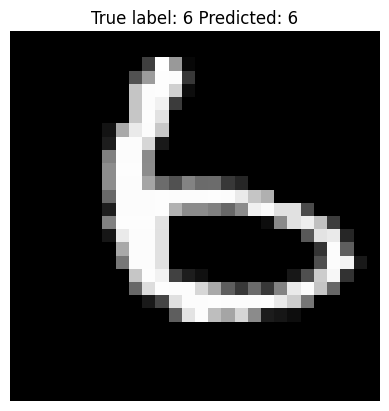

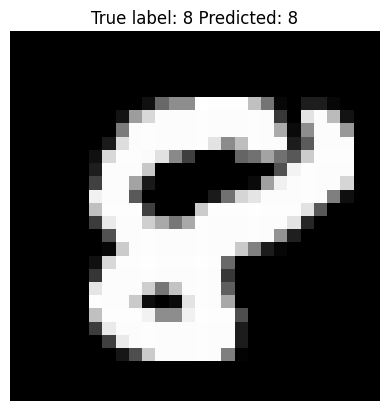

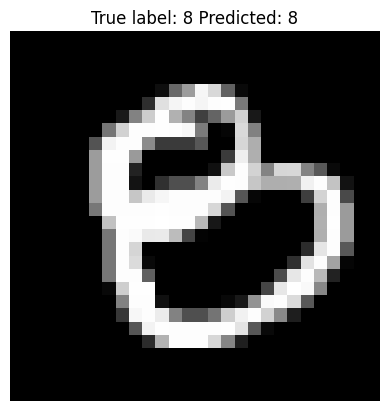

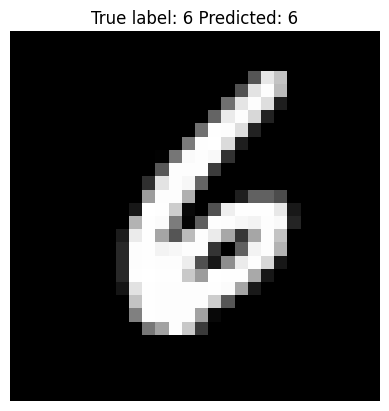

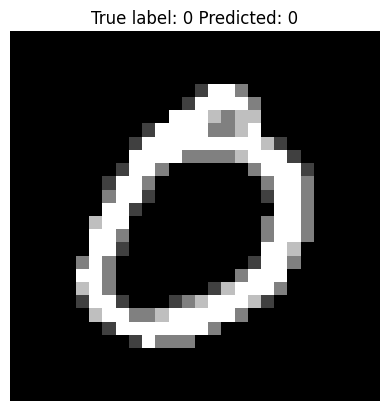

In [9]:
# Visualize the predictions:

import matplotlib.pyplot as plt
import numpy as np

# Choose random images to display
indices = np.random.choice(range(x_test.shape[0]), size=5, replace=False)

for i, idx in enumerate(indices):
    plt.figure(i)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True label: {np.argmax(y_test[idx])} Predicted: {predicted_classes[idx]}")
    plt.axis('off')
plt.show()


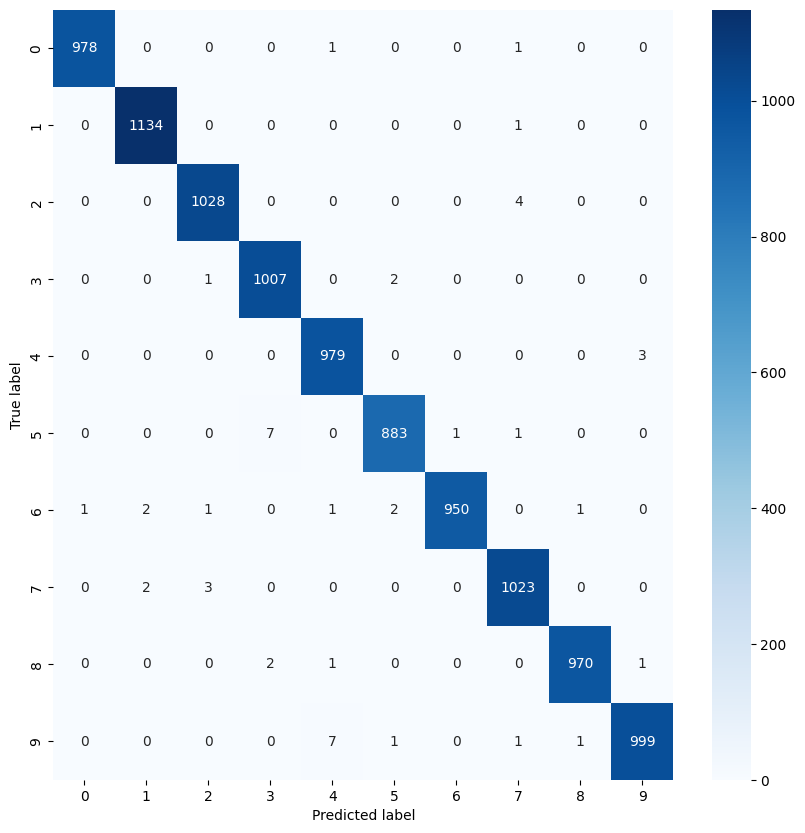

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# We need to convert the one-hot vectors back to single digit labels
y_true = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_true, predicted_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


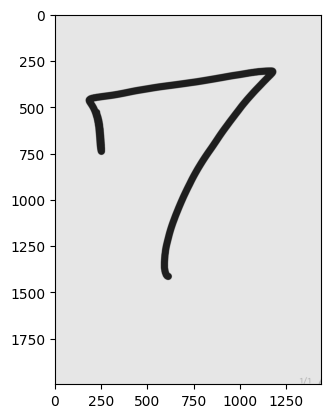

In [11]:
import cv2
import matplotlib.pyplot as plt

# Replace 'your_image.png' with the name of the uploaded image file
img = cv2.imread('WhatsApp Image 2023-07-16 at 08.28.28.jpeg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(img, cmap='gray')
plt.show()


In [13]:
import cv2

# Load the image
image = cv2.imread('WhatsApp Image 2023-07-16 at 08.28.28.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize it to 28x28 pixels
image = cv2.resize(image, (28, 28))

# Invert colors (optional, depending on your image)
image = cv2.bitwise_not(image)

# Normalize pixel values to [0, 1]
image = image / 255.0

# Reshape the image to the format expected by the model
image = image.reshape(1, 28, 28, 1)


In [14]:
prediction = model.predict(image)

# The prediction is a 10-element vector of probabilities.
# To get the predicted digit, take the index of the highest probability.
predicted_digit = np.argmax(prediction)

print('The predicted digit is:', predicted_digit)


1/1 [==============================] - 0s 35ms/step
The predicted digit is: 7
